<a href="https://colab.research.google.com/github/ChicoQ/my-mmdet/blob/main/mmdet_onnx_cascade_30June.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup the development environment

In [1]:
!pip install torch==1.7.0+cu110 torchvision==0.8.1+cu110 -f https://download.pytorch.org/whl/torch_stable.html
!pip install mmcv-full==1.2.7+torch1.7.0+cu110 -f https://openmmlab.oss-accelerate.aliyuncs.com/mmcv/dist/index.html
!pip install onnx onnxruntime onnxoptimizer 

!git clone https://github.com/ChicoQ/my-mmdet.git


Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |███████████████████████▌        | 834.1MB 1.6MB/s eta 0:03:09tcmalloc: large alloc 1147494400 bytes == 0x5572c1904000 @  0x7f075091d615 0x557288df5cdc 0x557288ed552a 0x557288df8afd 0x557288ee9fed 0x557288e6c988 0x557288e674ae 0x557288dfa3ea 0x557288e6c7f0 0x557288e674ae 0x557288dfa3ea 0x557288e6932a 0x557288eeae36 0x557288e68853 0x557288eeae36 0x557288e68853 0x557288eeae36 0x557288e68853 0x557288eeae36 0x557288f6d3e1 0x557288ecd6a9 0x557288e38cc4 0x557288df9559 0x557288e6d4f8 0x557288dfa30a 0x557288e683b5 0x557288e677ad 0x557288dfa3ea 0x557288e683b5 0x557288dfa30a 0x557288e683b5
     |█████████████████████████████▊  | 1055.7MB 1.3MB/s eta 0:01:01tcmalloc: large alloc 1434370048 bytes == 0x557305f5a000 @  0x7f075091d615 0x557288df5cdc 0x557288ed552a 0x557288df8afd 0x557288ee9fed 0x557288e6c988 0x557288e674ae 0x557288dfa3ea 0x557288e6c7f0 0x557288e674ae 0x557288dfa3ea 0x557288e6932a 0x557288eeae36 0x557288e68853 0

### install mmdet

In [1]:
%set_env PYTHONPATH=$PYTHONPATH:/content/my-mmdet

!cd my-mmdet && pip install -v -e .

env: PYTHONPATH=$PYTHONPATH:/content/my-mmdet
Created temporary directory: /tmp/pip-ephem-wheel-cache-n2hc950w
Created temporary directory: /tmp/pip-req-tracker-j_uuyga7
Created requirements tracker '/tmp/pip-req-tracker-j_uuyga7'
Created temporary directory: /tmp/pip-install-vrfg7p84
Obtaining file:///content/my-mmdet
  Added file:///content/my-mmdet to build tracker '/tmp/pip-req-tracker-j_uuyga7'
    Running setup.py (path:/content/my-mmdet/setup.py) egg_info for package from file:///content/my-mmdet
    Running command python setup.py egg_info
    running egg_info
    creating mmdet.egg-info
    writing mmdet.egg-info/PKG-INFO
    writing dependency_links to mmdet.egg-info/dependency_links.txt
    writing requirements to mmdet.egg-info/requires.txt
    writing top-level names to mmdet.egg-info/top_level.txt
    writing manifest file 'mmdet.egg-info/SOURCES.txt'
    adding license file 'LICENSE'
    writing manifest file 'mmdet.egg-info/SOURCES.txt'
  Source in /content/my-mmdet has

### please restart runtime

In [1]:
import mmdet
mmdet.__version__

'2.10.0'

### creating a workspace

## Fine-tune model


In [3]:
%set_env PYTHONPATH=$PYTHONPATH:/content/my-mmdet
!cd my-mmdet && python tools/train.py configs/cascade_rcnn/cascade_rcnn_r50_fpn_1x_voc0712.py

env: PYTHONPATH=$PYTHONPATH:/content/my-mmdet
2021-06-30 08:12:42,852 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.7.10 (default, May  3 2021, 02:48:31) [GCC 7.5.0]
CUDA available: True
GPU 0: Tesla K80
CUDA_HOME: /usr/local/cuda
NVCC: Build cuda_11.0_bu.TC445_37.28845127_0
GCC: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
PyTorch: 1.7.0+cu110
PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v1.6.0 (Git Hash 5ef631a030a6f73131c77892041042805a06064f)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.0
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_70,code=sm_70;-gencode;arch=

## Exporting to ONNX model

In [6]:
%set_env PYTHONPATH=$PYTHONPATH:/content/mmdetection
!cd my-mmdet && python tools/deployment/pytorch2onnx.py configs/cascade_rcnn/cascade_rcnn_r50_fpn_1x_voc0712.py \
work_dirs/cascade_rcnn_r50_fpn_1x_voc0712/epoch_12.pth \
--output-file work_dirs/cascade_rcnn_r50_fpn_1x_voc0712_28June.onnx \
--input-img /content/LCT04746-SLA-1-_Z.jpg \
--shape 1000 600 --simplify \
--verify --show \
--dataset voc

env: PYTHONPATH=$PYTHONPATH:/content/mmdetection
Use load_from_local loader
Use load_from_local loader
/content/my-mmdet/mmdet/core/anchor/anchor_generator.py:255: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  feat_h = int(feat_h)
/content/my-mmdet/mmdet/core/anchor/anchor_generator.py:256: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  feat_w = int(feat_w)
/content/my-mmdet/mmdet/core/anchor/anchor_generator.py:199: TracerWarning: Converting a tensor to a Python index might cause the trace to be incorrect. We can't record the data flow of Python values

## Inferece

In [7]:
from mmdet.models.detectors import BaseDetector
from mmdet.apis import init_detector, inference_detector

In [8]:
config_file = '/content/my-mmdet/configs/cascade_rcnn/cascade_rcnn_r50_fpn_1x_voc0712.py'

checkpoint_file = '/content/my-mmdet/work_dirs/cascade_rcnn_r50_fpn_1x_voc0712/epoch_12.pth'
device = 'cpu'

model = init_detector(config_file, checkpoint_file, device=device)

Use load_from_local loader


### inference_detector

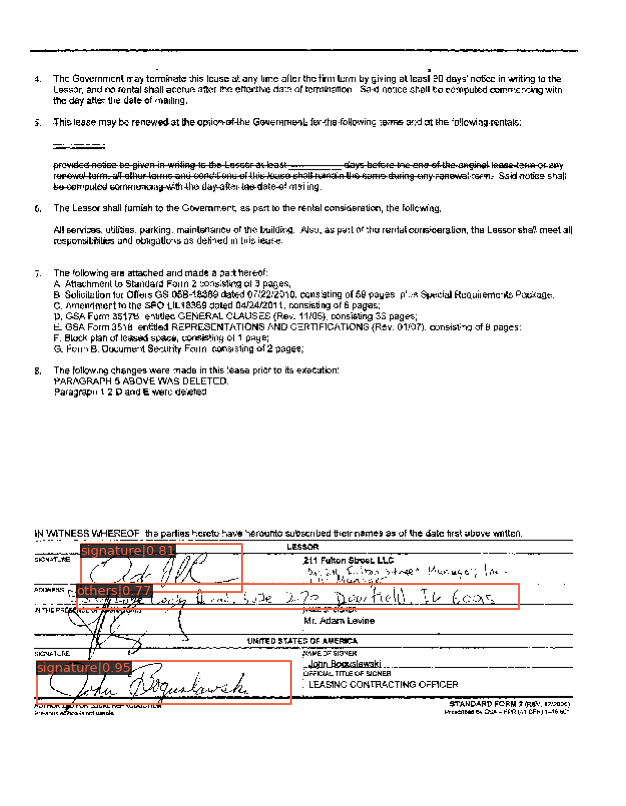

In [10]:
img = '/content/LIL18369-Lease_Z-1.jpg'
result = inference_detector(model, img)
BaseDetector.show_result(img=img, result=result, self=model, show=True, score_thr=0.5)

### pytorch2onnx

In [11]:
import sys

import onnx
import onnxruntime as rt

from mmdet.core.export import preprocess_example_input
from mmdet.core import build_model_from_cfg, generate_inputs_and_wrap_model
from mmdet.apis import show_result_pyplot

In [12]:
MODEL_PATH = '/content/my-mmdet/work_dirs/cascade_rcnn_r50_fpn_1x_voc0712_28June.onnx'

IMAGE_PATH = '/content/LIL18369-Lease_Z-1.jpg'

INP_DIMS = (1000, 600)

onnx_model = onnx.load(MODEL_PATH)
input_config = {
    'input_shape': (1, 3) + INP_DIMS,
    'input_path': IMAGE_PATH,
    'normalize_cfg': dict(mean=[123.675, 116.28, 103.53],
                          std=[58.395, 57.12, 57.375],
                          to_rgb=True)
    }

one_img, one_meta = preprocess_example_input(input_config)

#### pytorch_results

In [13]:
orig_model = build_model_from_cfg(config_path=config_file, checkpoint_path=checkpoint_file)

model, tensor_data = generate_inputs_and_wrap_model(
    config_path=config_file, 
    checkpoint_path=checkpoint_file, 
    input_config=input_config)

model.forward = orig_model.forward

Use load_from_local loader
Use load_from_local loader


In [14]:
tensor_data = [one_img]
pytorch_results = model(tensor_data, [[one_meta]], return_loss=False)
pytorch_results = pytorch_results[0]

In [15]:
from mmdet.core import get_classes

model.CLASSES = get_classes(dataset="voc")
print("model.CLASSES", model.CLASSES)
num_classes = len(model.CLASSES)

model.CLASSES ['signature', 'others']


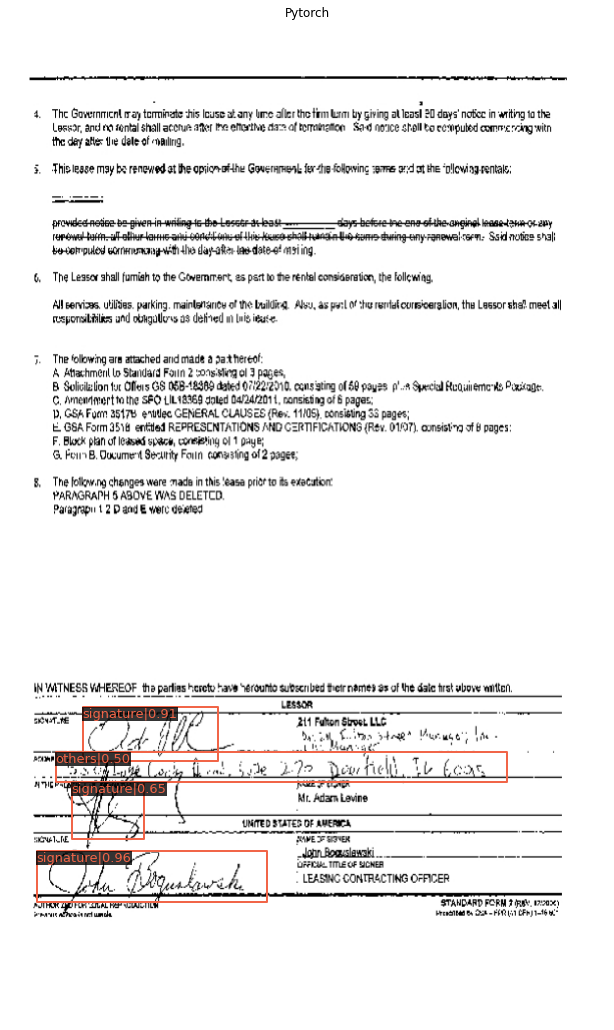

In [16]:
show_result_pyplot(model, one_meta['show_img'], pytorch_results, title='Pytorch', score_thr=0.5)

#### onnx_results

In [17]:
input_all = [node.name for node in onnx_model.graph.input]
input_initializer = [node.name for node in onnx_model.graph.initializer]
net_feed_input = list(set(input_all) - set(input_initializer))
assert (len(net_feed_input) == 1)



session_options = rt.SessionOptions()

feed_input_img = one_img.detach().numpy()

sess = rt.InferenceSession(MODEL_PATH,session_options)

onnx_outputs = sess.run(None, {net_feed_input[0]: feed_input_img})
output_names = [_.name for _ in sess.get_outputs()]
output_shapes = [_.shape for _ in onnx_outputs]


det_bboxes, det_labels = onnx_outputs[:2]
print("onnx det_labels", det_labels)

from mmdet.core import bbox2result
onnx_results = bbox2result(det_bboxes, det_labels, num_classes)

onnx det_labels [0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0
 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0
 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0]


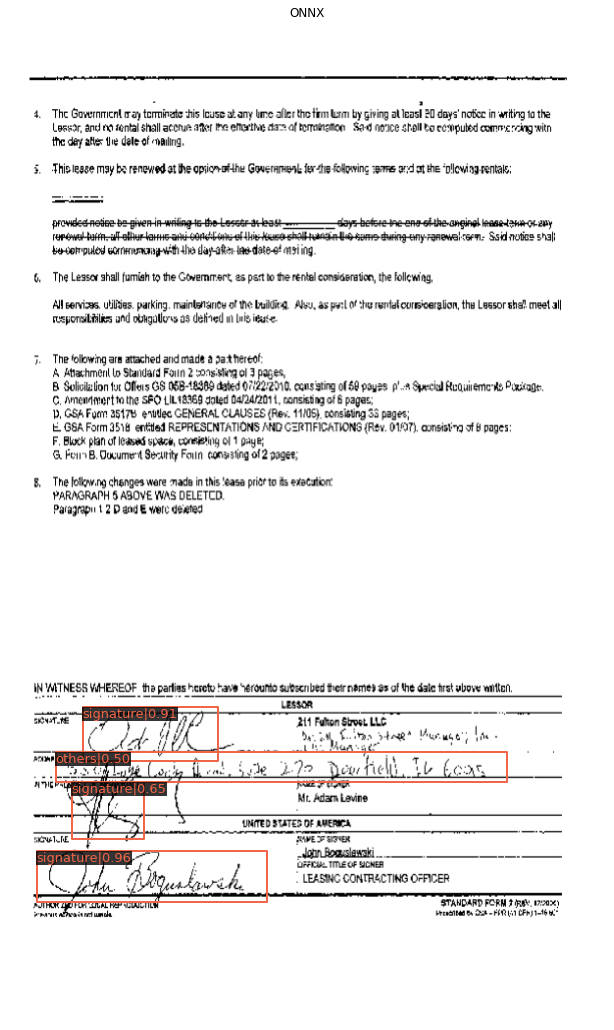

In [18]:
show_result_pyplot(model, one_meta['show_img'], onnx_results, title='ONNX', score_thr=0.5)